## **1. Import the dataset and libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
raw_dataset = pd.read_csv('dt_data.csv')

## **2. Splitting the Data**

#### **2.1 setup predictors and targets**

In [3]:
original_dataset = raw_dataset.copy().drop(columns=['#'])
class_map = {'P':1, 'F':0}
original_dataset['Rank'] = original_dataset['Rank'].map(class_map)
original_dataset

Rank  Q1    Q2  Q3  Q4  Q5  Q6  Q7   Q8   Q9  Unnamed: 11
0       0   0   0.0   0   0   2   6   0  6.4  6.4          NaN
1       0   0   4.0   0   0   2   5   0  6.4  2.7          NaN
2       1   3   8.0   5   4   3   9   4  8.6  6.4          NaN
3       1   0  10.0   0   1   0   7   4  7.9  9.1          NaN
4       0   0   6.0   7   0   3   0   2  5.7  5.5          NaN
..    ...  ..   ...  ..  ..  ..  ..  ..  ...  ...          ...
262     0   0   4.1   7   1   5   6   0  0.0  9.1          NaN
263     1   3   6.0   7   2   2   0   0  5.0  0.0          NaN
264     1   4   8.0   0   2   5   9   4  9.3  7.3          NaN
265     1   1   0.0   1   0   1  10   0  0.0  0.0          NaN
266     0   2   4.0   6   1   3   8   4  5.7  7.3          NaN

[267 rows x 11 columns]

In [4]:
X_selected = original_dataset.iloc[:, 1:-1]
X_selected

Q1    Q2  Q3  Q4  Q5  Q6  Q7   Q8   Q9
0     0   0.0   0   0   2   6   0  6.4  6.4
1     0   4.0   0   0   2   5   0  6.4  2.7
2     3   8.0   5   4   3   9   4  8.6  6.4
3     0  10.0   0   1   0   7   4  7.9  9.1
4     0   6.0   7   0   3   0   2  5.7  5.5
..   ..   ...  ..  ..  ..  ..  ..  ...  ...
262   0   4.1   7   1   5   6   0  0.0  9.1
263   3   6.0   7   2   2   0   0  5.0  0.0
264   4   8.0   0   2   5   9   4  9.3  7.3
265   1   0.0   1   0   1  10   0  0.0  0.0
266   2   4.0   6   1   3   8   4  5.7  7.3

[267 rows x 9 columns]

In [5]:
X_selected.shape

(267, 9)

In [6]:
y = original_dataset['Rank']
y

0      0
1      0
2      1
3      1
4      0
      ..
262    0
263    1
264    1
265    1
266    0
Name: Rank, Length: 267, dtype: int64

## **Calculate Entropy, Average Entropy, Information Gain**

In [7]:
# Entropy
class Calculate:

    def __init__(self, name_score = None):
        self.name_score = name_score

    def data_processing(self, name_score, X_selected, original_dataset):
        quantity_score = dict() # key là giá trị xuất hiện trong cột Q với value là số lần xuất hiện 
        quantity_rank = dict() # key là giá trị xuất hiện trong cột Q với value là số lần xuất hiện của [F,P]
        quantity_S = {'F':0,'P':0} # value là số lần xuất hiện
        for k, j in zip(X_selected[name_score], original_dataset['Rank']):
            # Kiểm tra xem k đã là khóa hay chưa
            if k in quantity_score:
                quantity_score[k] += 1
                if j == 0:
                    quantity_rank[k][0] += 1
                    quantity_S['F'] += 1
                elif j == 1:
                    quantity_rank[k][1] += 1
                    quantity_S['P'] += 1
            # Nếu k chưa là giá trị khóa thì khởi tạo
            else:
                quantity_score[k] = 1
                if (j == 0):
                    quantity_rank[k] = [1,0]
                    quantity_S['F'] += 1
                elif j == 1:
                    quantity_rank[k] = [0,1]
                    quantity_S['P'] += 1
        return quantity_score, quantity_rank, quantity_S
        
    def calculate_entropy(self, quantity_score):
        H = 0 
        total = sum(sum(value) if isinstance(value, list) else value for value in quantity_score.values())
        for values in quantity_score.values():
            if isinstance(values, list):
                for value in values:
                    # Dùng để tính entropy của P và F
                    if value == 0 or value == total:
                        return 0
                    H -= (value/ total) * np.log2((value/ total)) 
            else:
                # Dùng để tính entropy của các thuộc tính điểm 
                H -= (values/ total) * np.log2((values/ total)) 
        return H

    def calculate_average_entropy(self, quantity_score, quantity_rank):
        AE = 0
        for k, j in zip(quantity_score.items(), quantity_rank.items()):
            key, value = j
            temp_item = {key:value} # Là 1 phần tử trong quantity_rank
            score, _ = k
            AE += (  quantity_score[score] / 267 ) * self.calculate_entropy(temp_item)
        return AE


    def calculate_information_gain(self, quantity_score, quantity_rank, S):
        IG = self.calculate_entropy(S) - self.calculate_average_entropy(quantity_score, quantity_rank) 
        return IG

#main 
class Main:
    def __init__(self, X_selected, original_dataset):
        self.X_selected = X_selected
        self.original_dataset = original_dataset
    
    def solve(self):
        df = pd.DataFrame(self.X_selected)
        column_names = df.columns
        flag = True
        while flag:
            print("Nhập vào tên thuộc tính điểm số cần tính toán:")
            name_score = input()
            cal = Calculate(name_score)
            if name_score not in column_names:
                print("Vui lòng nhập lại tên thuộc tính điểm số!")
                continue
            quantity_score, quantity_rank, quantity_S = cal.data_processing(name_score, self.X_selected, self.original_dataset)
            H = cal.calculate_entropy(quantity_score)
            AE = cal.calculate_average_entropy(quantity_score, quantity_rank)
            IG = cal.calculate_information_gain(quantity_score, quantity_rank, quantity_S)
            print(name_score)
            print("Entropy value:",H)
            print("Average Entropy value:",AE)
            print("Information Gain value:", IG)
            while True:
                print("Nhập 1 để tiếp tục hoặc 0 để dừng chương trình:")
                check = int(input())
                if check == 0:
                    flag = False
                    break
                elif check == 1:
                    break
                else:
                    print("Giá trị không hợp lệ!")
                    continue
                
    
if __name__ == "__main__":
    main_instance = Main(X_selected, original_dataset)
    main_instance.solve()

Nhập vào tên thuộc tính điểm số cần tính toán:
Q1
Entropy value: 2.5248962387450886
Average Entropy value: 0.8643297071195146
Information Gain value: 0.05766599597492594
Nhập 1 để tiếp tục hoặc 0 để dừng chương trình:


#### **2.2 train test split**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)
X_train.shape, X_test.shape

((213, 9), (54, 9))

## **3. Decision Tree Models & Training**

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
my_tree = DecisionTreeClassifier(max_depth=7)
# fit the model 
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [11]:
#predicting the target value from the model for the samples
y_test_tree = my_tree.predict(X_test)
y_train_tree = my_tree.predict(X_train)

In [12]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9531
Decision Tree: Accuracy on test Data: 0.7222


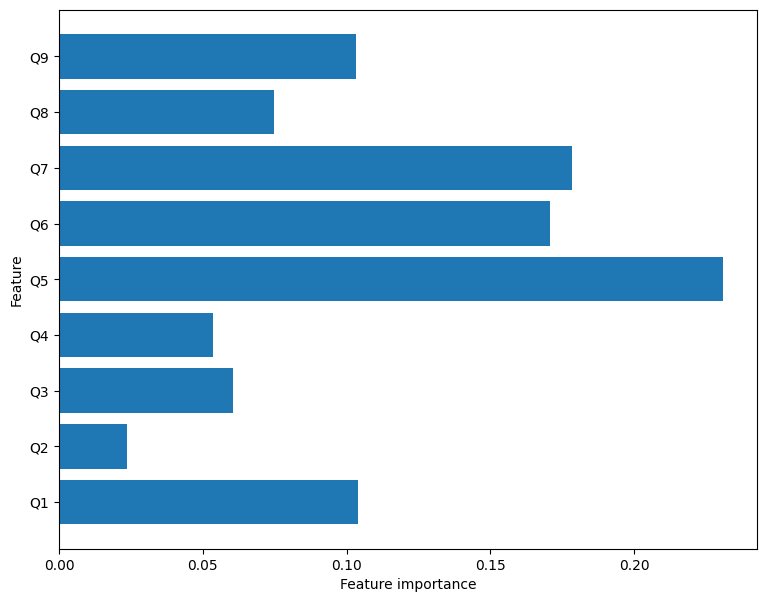

In [13]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), my_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### **2. Visualize**

In [14]:
from sklearn import tree
text_representation = tree.export_text(my_tree)
print(text_representation)

|--- feature_6 <= 1.00
|   |--- feature_4 <= 0.50
|   |   |--- feature_2 <= 5.50
|   |   |   |--- feature_1 <= 6.05
|   |   |   |   |--- feature_1 <= 1.00
|   |   |   |   |   |--- feature_8 <= 0.45
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  0.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  6.05
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_1 <= 7.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  7.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  5.50
|   |   |   |--- class: 1
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_5 <= 6.50
|   |   |  

In [15]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(my_tree, 
                   feature_names=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9'],  
                   class_names=['P', 'F'],
                   filled=True)

fig.savefig("decision_tree.png")